In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
cf10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


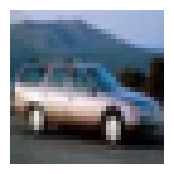

In [ ]:
img = train_images[4]
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.binary)
plt.axis("off")
plt.show()

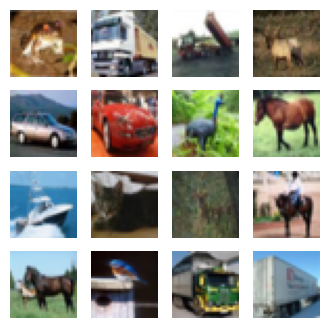

In [ ]:
m=4
k=0
plt.figure(figsize=(4,4))
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(train_images[k])
    k += 1
    plt.axis("off")
plt.show()

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
def modelCNN():
    model = keras.Sequential([
                           keras.layers.Input(shape=(32, 32, 3)),
                           keras.layers.Conv2D(32, (3, 3), strides=(1,1), padding='same'),
                           keras.layers.MaxPooling2D(2, 2),
                           keras.layers.Conv2D(64, (3, 3), strides=(1,1), padding='same'),
                           keras.layers.MaxPooling2D(2, 2),
                           keras.layers.Dropout(0.3),
                           keras.layers.Flatten(),
                           keras.layers.Dense(256, activation='LeakyReLU'),
                           keras.layers.Dropout(0.3),
                           keras.layers.Dense(128, activation='LeakyReLU'),
                           keras.layers.Dropout(0.3),
                           keras.layers.Dense(10, activation='Softmax')],
                          name="CNN-CF10")
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = modelCNN()
model.summary()

Model: "CNN-CF10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0  

In [ ]:
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
history = model.fit(train_images, train_labels, batch_size=128, epochs=25, shuffle=True)

Epoch 1/25
391/391 [==============================] - 81s 202ms/step - loss: 1.5239 - accuracy: 0.4541
Epoch 2/25
391/391 [==============================] - 75s 192ms/step - loss: 1.1751 - accuracy: 0.5871
Epoch 3/25
391/391 [==============================] - 78s 199ms/step - loss: 1.0622 - accuracy: 0.6295
Epoch 4/25
391/391 [==============================] - 76s 195ms/step - loss: 0.9903 - accuracy: 0.6548
Epoch 5/25
391/391 [==============================] - 75s 192ms/step - loss: 0.9414 - accuracy: 0.6714
Epoch 6/25
391/391 [==============================] - 76s 194ms/step - loss: 0.9000 - accuracy: 0.6859
Epoch 7/25
391/391 [==============================] - 75s 191ms/step - loss: 0.8543 - accuracy: 0.6992
Epoch 8/25
391/391 [==============================] - 76s 195ms/step - loss: 0.8271 - accuracy: 0.7113
Epoch 9/25
391/391 [==============================] - 75s 191ms/step - loss: 0.7945 - accuracy: 0.7225
Epoch 10/25
391/391 [==============================] - 76s 195ms/step - l

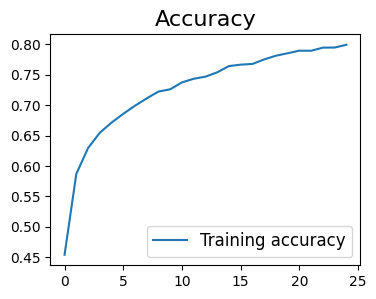

<Figure size 640x480 with 0 Axes>

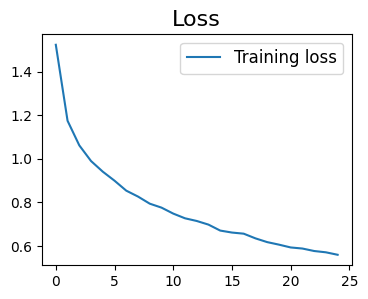

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(4,3))
plt.plot(accuracy, label='Training accuracy')
plt.title('Accuracy', fontsize=16)
plt.legend(fontsize=12)
plt.figure()
plt.figure(figsize=(4,3))
plt.plot(loss, label='Training loss')
plt.title('Loss', fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [ ]:
num_classes = 10
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)

val_loss, val_acc = model.evaluate(test_images, test_labels)
print("Loss : " + str(val_loss*100))
print("Accuracy : " + str(val_acc*100))

313/313 [==============================] - 7s 22ms/step - loss: 0.8223 - accuracy: 0.7277
Loss : 82.22792148590088
Accuracy : 72.76999950408936


313/313 [==============================] - 10s 31ms/step


Text(58.222222222222214, 0.5, 'Truth')

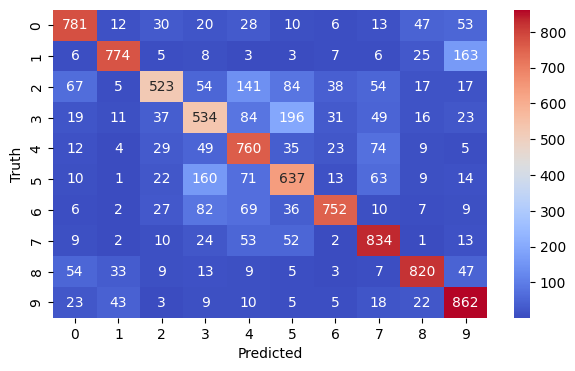

In [ ]:
preds_labels = model.predict(test_images)
predicted_labels = [np.argmax(i) for i in preds_labels]
cm = tf.math.confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.save('cifar10.keras')